<a href="https://colab.research.google.com/github/julienierwinski/PatchCamelyonMLProject/blob/main/PCam_PathFoundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminary Code: Load Google's Path Foundation Model
Load the PathFoundation model from Hugging Face using from_pretrained_keras



In [ ]:
# Import necessary libraries: from_pretrained_keras and notebook_login from huggingface_hub, numpy, tensorflow, and tqdm for progress bars
from huggingface_hub import from_pretrained_keras, notebook_login
import numpy as np
import tensorflow as tf
from tqdm.auto import tqdm # Import tqdm


# Authenticate with Hugging Face - this is required to download models from the Hugging Face Hub
try:
    notebook_login()
except Exception as e:
    print(f"Hugging Face login failed: {e}")

Iterates through the **training** dataloader to extract embedding vectors and corresponding labels for PCam training dataset and saves these embedding/label files

In [ ]:
# Load the "google/path-foundation" model from the Hugging Face Hub using from_pretrained_keras
pathfoundation_model = from_pretrained_keras("google/path-foundation")

# Initialize empty lists to store the generated embeddings and their corresponding labels for the training data
train_embeddings = []
train_labels = []

# Get the inference signature from the loaded PathFoundation model
infer = pathfoundation_model.signatures["serving_default"]

# Iterate through the training dataloader
for images, labels in tqdm(train_dataloader, desc="Generating training embeddings"):
    # Convert the images from the dataloader (PyTorch Tensors) to TensorFlow tensors,
    # Scale the pixel values to the range [0, 1] by dividing by 255.0
    images_tf = tf.cast(images, tf.float32) / 255.0

    # Resize the images to the input size expected by the PathFoundation model (224x224)
    images_resized = tf.image.resize(images_tf, [224, 224])

    # Generate embeddings by passing the resized images through the inference signature
    embeddings = infer(images_resized)

    # Extract the embedding vectors from the output
    embedding_vectors = embeddings['output_0'].numpy()

    # Extend the lists with the generated embedding vectors and the corresponding labels
    train_embeddings.extend(embedding_vectors)
    train_labels.extend(labels.numpy())

# Convert the lists of embeddings and labels to NumPy arrays
train_embeddings = np.array(train_embeddings)
train_labels = np.array(train_labels)

# Print the shapes of the resulting NumPy arrays to verify the dimensions
print("Shape of training embeddings:", train_embeddings.shape)
print("Shape of training labels:", train_labels.shape)

# Save the generated training embeddings and labels to disk as NumPy `.npy` files
np.save('train_embeddings.npy', train_embeddings)
np.save('train_labels.npy', train_labels)

Iterates through dataloader to extract embeddings and their labels for the PCam **validation** dataset and saves validation embedding/label files

In [ ]:
# Initialize empty lists to store the generated embeddings and their corresponding labels for the validation data
val_embeddings = []
val_labels = []

# Get the inference signature from the loaded PathFoundation model
infer = pathfoundation_model.signatures["serving_default"]

# Iterate through the validation dataloader
for images, labels in tqdm(val_dataloader, desc="Generating validation embeddings"):
    # Convert the images from the dataloader (PyTorch Tensors) to TensorFlow tensors
    # Scale the pixel values to the range [0, 1] by dividing by 255.0
    images_tf = tf.cast(images, tf.float32) / 255.0

    # Resize the images to the input size expected by the PathFoundation model (224x224)
    images_resized = tf.image.resize(images_tf, [224, 224])

    # Generate embeddings by passing the resized images through the inference signature
    embeddings = infer(images_resized)
    # Extract the embedding vectors from the output
    embedding_vectors = embeddings['output_0'].numpy()

    # Extend the lists with the generated embedding vectors and the corresponding labels
    val_embeddings.extend(embedding_vectors)
    val_labels.extend(labels.numpy())

# Convert the lists of embeddings and labels to NumPy arrays
val_embeddings = np.array(val_embeddings)
val_labels = np.array(val_labels)

# Print the shapes of the resulting NumPy arrays to verify the dimensions
print("Shape of validation embeddings:", val_embeddings.shape)
print("Shape of validation labels:", val_labels.shape)

# Save the generated validation embeddings and labels to disk as NumPy `.npy` files
np.save('val_embeddings.npy', val_embeddings)
np.save('val_labels.npy', val_labels)

Iterate through dataloader for **test** dataset to get test embeddings and labels, save to file

In [ ]:
# Initialize empty lists to store the generated embeddings and their corresponding labels for the test data
test_embeddings = []
test_labels = []

# Get the inference signature from the loaded PathFoundation model
infer = pathfoundation_model.signatures["serving_default"]

# Iterate through the test dataloader
for images, labels in tqdm(test_dataloader, desc="Generating test embeddings"):
    # Convert the images from the dataloader (PyTorch Tensors) to TensorFlow tensors
    # Scale the pixel values to the range [0, 1] by dividing by 255.0
    images_tf = tf.cast(images, tf.float32) / 255.0

    # Resize the images to the input size expected by the PathFoundation model (224x224)
    images_resized = tf.image.resize(images_tf, [224, 224])

    # Generate embeddings by passing the resized images through the inference signature
    embeddings = infer(images_resized)
    # Extract the embedding vectors from the output
    embedding_vectors = embeddings['output_0'].numpy()

    # Extend the lists with the generated embedding vectors and the corresponding labels
    test_embeddings.extend(embedding_vectors)
    test_labels.extend(labels.numpy())

# Convert the lists of embeddings and labels to NumPy arrays
test_embeddings = np.array(test_embeddings)
test_labels = np.array(test_labels)

# Print the shapes of the resulting NumPy arrays to verify the dimensions
print("Shape of test embeddings:", test_embeddings.shape)
print("Shape of test labels:", test_labels.shape)

# Save the generated test embeddings and labels to disk as NumPy `.npy` files
np.save('drive/MyDrive/pcam/test_embeddings.npy', test_embeddings)
np.save('drive/MyDrive/pcam/test_labels.npy', test_labels)

# Import Path Foundation embeddings and labels for training, validation, and test sets
From Google Drive, initialize the training, validation, and test embeddings and labels where the embeddings are the vector representations of the PCam image

In [ ]:
# Import the drive module from google.colab to mount Google Drive
from google.colab import drive
# Mount Google Drive to the '/content/drive' directory
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the numpy library
import numpy as np

# Load the saved training, validation, and test embeddings and labels from the specified file paths
#     generated from Path Foundation Model
#     (file paths are located within the mounted Google Drive)
train_x = np.load("drive/MyDrive/pcam/train_embeddings.npy")
train_y = np.load("drive/MyDrive/pcam/train_labels.npy")

val_x = np.load("drive/MyDrive/pcam/val_embeddings.npy")
val_y = np.load("drive/MyDrive/pcam/val_labels.npy")

test_x = np.load("drive/MyDrive/pcam/test_embeddings.npy")
test_y = np.load("drive/MyDrive/pcam/test_labels.npy")

# Import necessary skikit-learn modules
Libraries needed for classification (Multi-layer Perceptron, Logistic Regression, and Adaboos ensemble classifiers), randomzed grid search, and evaluation metrics for model performance

In [ ]:
# Import necessary scikit-learn modules for classification, model selection (hyperparameter tuning), and evaluation
import os
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

# Perform Hyper-parameter tuning for each Classifier
Define the MLP, LR, and AdaBoost Classifiers with the parameter grids to search over via a randomized grid search

In [ ]:
# Define list to store tuples, consisting of classifier, instance, and parameter grid for hyperparameter tuning
classifiers_and_params = []

# Define parameter grid for the MLPClassifier with specified parameters to search
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate_init': [0.0001, 0.001, 0.01]
}
# Append MLPClassifier and its parameter grid to list
classifiers_and_params.append(('MLPClassifier', MLPClassifier(max_iter=150, early_stopping=True, random_state=42), mlp_params))

# Define parameter grid for the LogisticRegression classifier with specified parameters to search
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
# Append LogisticRegression classifier and its parameter grid to list
classifiers_and_params.append(('LogisticRegression', LogisticRegression(max_iter=1000, random_state=42), lr_params))

# Define the parameter grid for the HistGradientBoostingClassifier and specified params to search
hgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200],
    'max_depth': [3, 4, 5]
}

# Append HistGradientBoostingClassifier and its parameter grid to list
classifiers_and_params.append(('HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=42), hgb_params))


Perform hyperparameter tuning by randomly resampling from train_x and train_y with randomized grid search to more efficiently find optimal parameters for each classifier

In [ ]:

# Resample training setembeddings and labels from saved NumPy files for efficiency in hyperparameter tuning
train_x_small, train_y_small = resample(train_x, train_y, n_samples=10000, random_state=42)

# Initialize dictionary to store best estimator found for each classifier
best_estimators = {}

# Iterate through the list of classifiers and their parameter grids
for name, classifier, params in classifiers_and_params:
    print(f"\nPerforming GridSearchCV for {name}...")

    grid_search = RandomizedSearchCV(classifier, params, cv=3, scoring='accuracy', n_iter=5, n_jobs=-1, random_state=42)

    # Fit grid search to training data
    grid_search.fit(train_x_small, train_y_small)

    # Print best hyperparameters
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    # Print best cross-validation score (accuracy) achieved with best parameters
    print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_:.4f}")

    # Store best estimator (model trained with best parameters) in the dictionary
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best estimator for {name} stored.")


Performing GridSearchCV for MLPClassifier...
Best parameters for MLPClassifier: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (50, 50), 'activation': 'relu'}
Best cross-validation accuracy for MLPClassifier: 0.9565
Best estimator for MLPClassifier stored.

Performing GridSearchCV for LogisticRegression...
Best parameters for LogisticRegression: {'solver': 'lbfgs', 'C': 0.01}
Best cross-validation accuracy for LogisticRegression: 0.9507
Best estimator for LogisticRegression stored.

Performing GridSearchCV for HistGradientBoostingClassifier...
Best parameters for HistGradientBoostingClassifier: {'max_iter': 100, 'max_depth': 4, 'learning_rate': 0.1}
Best cross-validation accuracy for HistGradientBoostingClassifier: 0.9430
Best estimator for HistGradientBoostingClassifier stored.


# Multi-Layer Perceptron Training, Validation, and Test
Train the MLP classifier using the best hyperparameters found from above cell:

Best parameters for MLPClassifier: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (50,), 'activation': 'relu'}


In [ ]:
# Use the best parameters found above to train MLPClassifier and Validate

mlp = MLPClassifier(
    solver='adam',
    learning_rate_init=0.001,
    hidden_layer_sizes=(50,),
    activation='relu',
    early_stopping=True,
    max_iter=150,
    verbose=True,
    random_state=42
)


mlp.fit(train_x, train_y)
mlp_val_predictions = mlp.predict(val_x)
mlp_accuracy = accuracy_score(val_y, mlp_val_predictions)
print(f"Validation Accuracy: {mlp_accuracy:.4f}")

Iteration 1, loss = 0.13540665
Validation score: 0.965897
Iteration 2, loss = 0.09455596
Validation score: 0.970246
Iteration 3, loss = 0.08215289
Validation score: 0.972916
Iteration 4, loss = 0.07410442
Validation score: 0.974862
Iteration 5, loss = 0.06873047
Validation score: 0.974938
Iteration 6, loss = 0.06398477
Validation score: 0.976159
Iteration 7, loss = 0.06040146
Validation score: 0.977761
Iteration 8, loss = 0.05761087
Validation score: 0.977837
Iteration 9, loss = 0.05530581
Validation score: 0.980126
Iteration 10, loss = 0.05312661
Validation score: 0.979172
Iteration 11, loss = 0.05091995
Validation score: 0.979592
Iteration 12, loss = 0.04972047
Validation score: 0.978905
Iteration 13, loss = 0.04762710
Validation score: 0.979096
Iteration 14, loss = 0.04603471
Validation score: 0.979477
Iteration 15, loss = 0.04500244
Validation score: 0.980088
Iteration 16, loss = 0.04444750
Validation score: 0.976349
Iteration 17, loss = 0.04283248
Validation score: 0.979172
Iterat

Test the MLP classifier on the test set and report accuracy

In [ ]:
# Test MLP Classifier on test set

mlp_test_predictions = mlp.predict(test_x)
mlp_test_accuracy = accuracy_score(test_y, mlp_test_predictions)
print(f" MLP Test Accuracy: {mlp_test_accuracy:.4f}")

 MLP Test Accuracy: 0.8685


Generate confusion matrix based on MLP test results

Confusion Matrix:
[[16058   333]
 [ 3976 12401]]


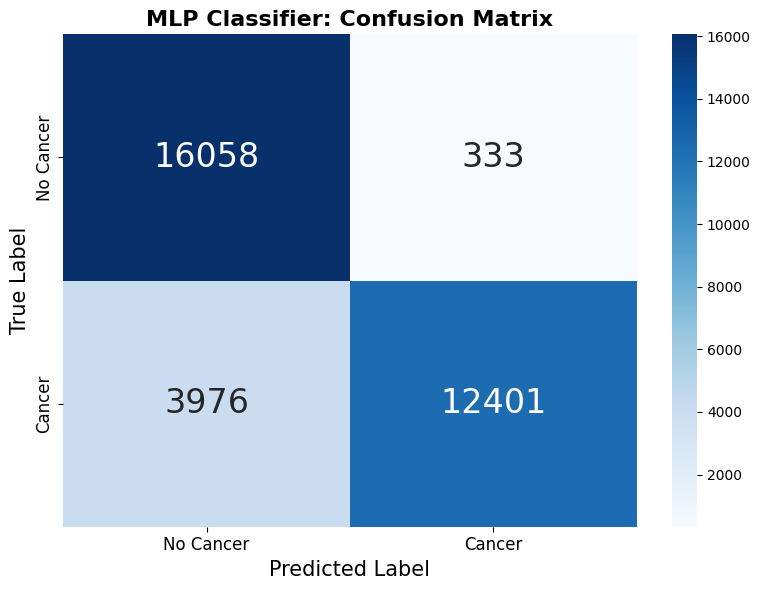

In [ ]:
# Compute confusion matrix

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, mlp_test_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Use matplotlyb for visual of confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, mlp_test_predictions)

class_names = ["No Cancer", "Cancer"]

# Plot the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 24})

plt.title("MLP Classifier: Confusion Matrix", fontsize=16, fontweight='bold')
plt.xticks(ticks=[0.5, 1.5], labels=class_names, fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=class_names, fontsize=12)
plt.xlabel("Predicted Label", fontsize = 15)
plt.ylabel("True Label", fontsize=15)
plt.tight_layout()
plt.show()


# Logistic Regression Training, Validation, and Test
Train the Logistic Regression classifier based on the best hyperparameters:

Best parameters for LogisticRegression: {'solver': 'lbfgs', 'C': 0.01}


In [ ]:
# Logistic Regression Using Best Hyperparameters

# Train LR and Validate

lr = LogisticRegression(
    solver='lbfgs',
    C=0.01,
    max_iter=750,
    random_state=42
)

lr.fit(train_x, train_y)
lr_val_predictions = lr.predict(val_x)
lr_accuracy = accuracy_score(val_y, lr_val_predictions)
print(f"Validation Accuracy: {lr_accuracy:.4f}")

Validation Accuracy: 0.9075


Test trained Logistic Regression classifier on test set and report accuracy performance

In [ ]:
# Test LR on test set

lr_test_predictions = lr.predict(test_x)
lr_test_accuracy = accuracy_score(test_y, lr_test_predictions)
print(f"LR Test Accuracy: {lr_test_accuracy:.4f}")

LR Test Accuracy: 0.9240


Generate confusion matrix for Logistic Regression classifier

Confusion Matrix:
[[15839   552]
 [ 1937 14440]]


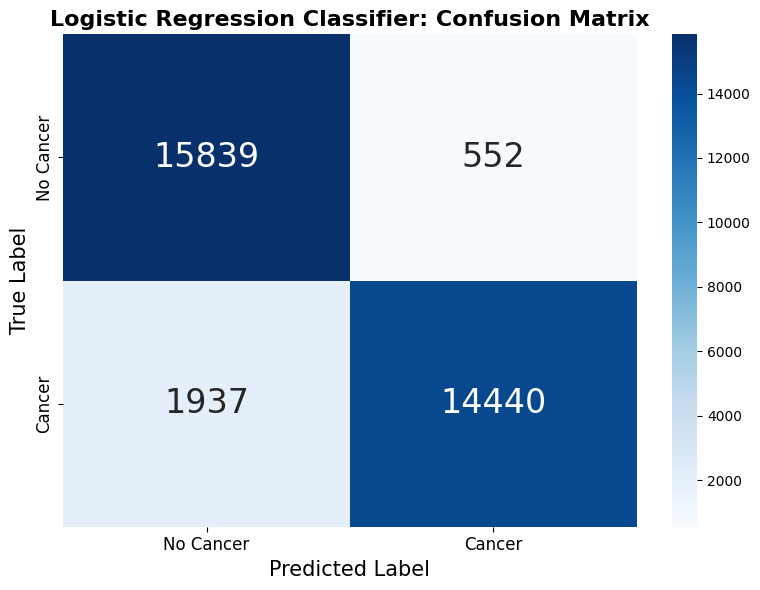

In [ ]:
# Compute confusion matrix

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, lr_test_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Use matplotlyb for visual of confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, lr_test_predictions)

class_names = ["No Cancer", "Cancer"]

# Plot the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 24})

plt.title("Logistic Regression Classifier: Confusion Matrix", fontsize=16, fontweight='bold')
plt.xticks(ticks=[0.5, 1.5], labels=class_names, fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=class_names, fontsize=12)
plt.xlabel("Predicted Label", fontsize = 15)
plt.ylabel("True Label", fontsize=15)
plt.tight_layout()
plt.show()


# HistGradientBoostingClassifier (Ensemble Classifier) Training, Validation, and Test
First, train HistGradientBoostingClassifier using the best hyperparameters found from above:

Best parameters for HistGradientBoostingClassifier: {'max_iter': 100, 'max_depth': 4, 'learning_rate': 0.1}


In [ ]:
# HistGradientBoostingClassifier Using Best Hyperparameters
# Train and validate

hgb = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_iter=100,
    max_depth=4,
    early_stopping=True,
    verbose=True,
    random_state=42
)

hgb.fit(train_x, train_y)
hgb_val_predictions = hgb.predict(val_x)
hgb_accuracy = accuracy_score(val_y, hgb_val_predictions)
print(f"Validation Accuracy: {hgb_accuracy:.4f}")

Binning 0.725 GB of training data: 15.872 s
Binning 0.081 GB of validation data: 1.335 s
Fitting gradient boosted rounds:
Fit 100 trees in 55.149 s, (1594 total leaves)
Time spent computing histograms: 33.945s
Time spent finding best splits:  1.339s
Time spent applying splits:      0.539s
Time spent predicting:           0.071s
Validation Accuracy: 0.9039


Test HistGradientBoostingClassifier on test set and calculate accuracy

In [ ]:
# Test on test set
# Calculate AUC

from sklearn.metrics import roc_auc_score

hgb_test_predictions = hgb.predict(test_x)
hgb_test_accuracy = accuracy_score(test_y, hgb_test_predictions)
hgb_test_auc = roc_auc_score(test_y, hgb_test_predictions)
print(f"HGB Test Accuracy: {hgb_test_accuracy:.4f}")
print(f"HGB Test AUC: {hgb_test_auc:.4f}")

HGB Test Accuracy: 0.9044
HGB Test AUC: 0.9044


Compute confusion matrix for HistGradientBoostingClassifier

Confusion Matrix:
[[15854   537]
 [ 2596 13781]]


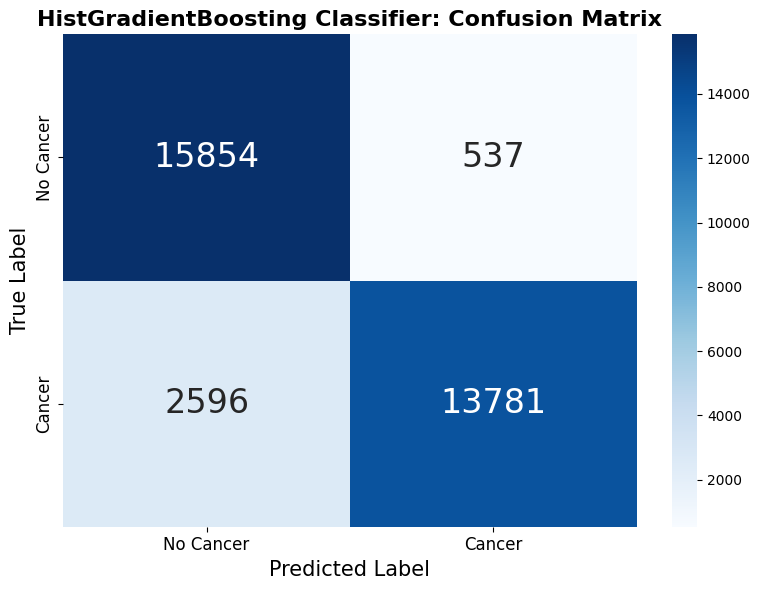

In [ ]:
# Compute confusion matrix

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, hgb_test_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Use matplotlyb for visual of confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, hgb_test_predictions)
class_names = ["No Cancer", "Cancer"]

# Plot the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 24})

plt.title("HistGradientBoosting Classifier: Confusion Matrix", fontsize=16, fontweight='bold')
plt.xticks(ticks=[0.5, 1.5], labels=class_names, fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=class_names, fontsize=12)
plt.xlabel("Predicted Label", fontsize = 15)
plt.ylabel("True Label", fontsize=15)
plt.tight_layout()
plt.show()


# Visualize the data using dimensionality techniques
Applies t-SNE and UMAP to a subset of the Path Foundation embeddings for PCam and creates scatter plots

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


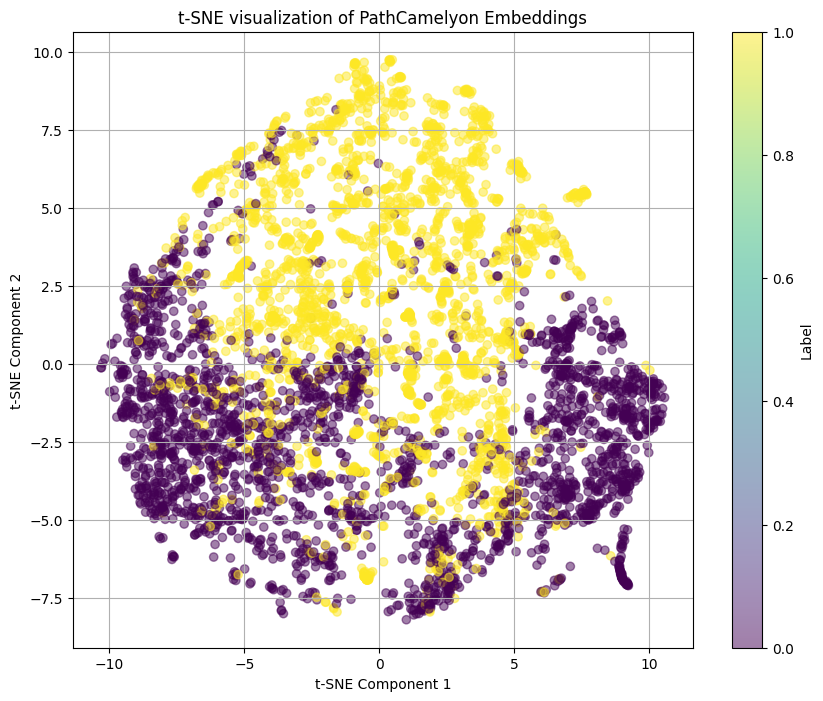

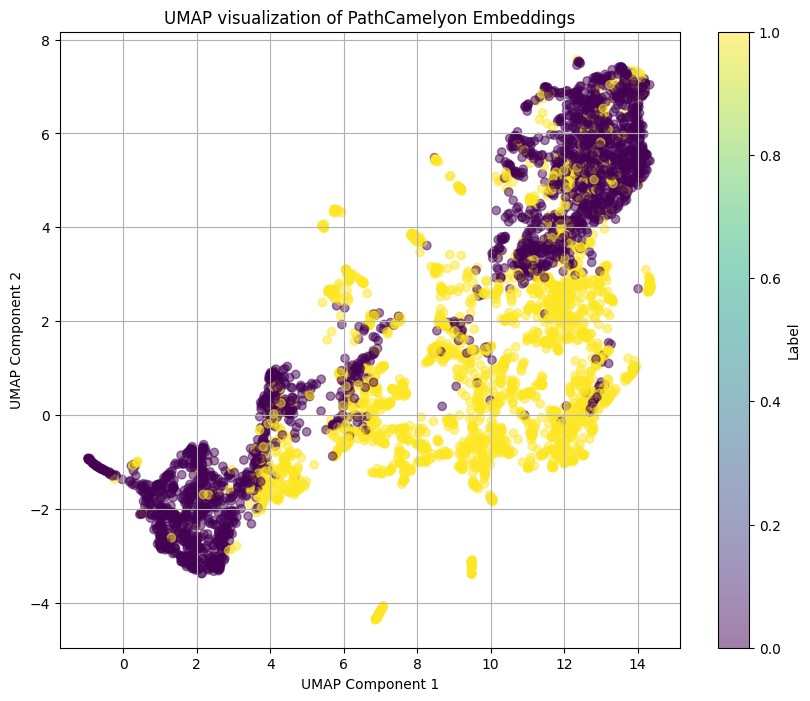

In [ ]:
# Import necessary libraries
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Load the training embeddings and labels from the saved NumPy files
embeddings = np.load("/content/drive/MyDrive/pcam/train_embeddings.npy")
labels = np.load("/content/drive/MyDrive/pcam/train_labels.npy")

# For efficiency, sample random subset of PCam data (embeddings and labels)
n_samples = 5000

random_indices = np.random.choice(len(embeddings), size=n_samples, replace=False)
subset_embeddings = embeddings[random_indices]
subset_labels = labels[random_indices]

# Apply t-SNE to the subset of embeddings
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300)
tsne_embeddings = tsne.fit_transform(subset_embeddings)


# Apply UMAP to the subset of embeddings
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
umap_embeddings = reducer.fit_transform(subset_embeddings)



# Create a scatter plot for the t-SNE embeddings
plt.figure(figsize=(10, 8))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=subset_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE visualization of PathCamelyon Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Label')
plt.grid(True)
plt.savefig('tsne_plot.png')
plt.show()

# Create a scatter plot for the UMAP embeddings
plt.figure(figsize=(10, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=subset_labels, cmap='viridis', alpha=0.5)
plt.title('UMAP visualization of PathCamelyon Embeddings')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Label')
plt.grid(True)
plt.savefig('umap_plot.png')
plt.show()